In [135]:
import numpy as np
import math as m
from astropy import units as u
from astropy import constants as const
import matplotlib.pyplot as plt
from pylab import polyfit, polyval
from scipy import integrate
%matplotlib inline

# 1 Hubble's Law

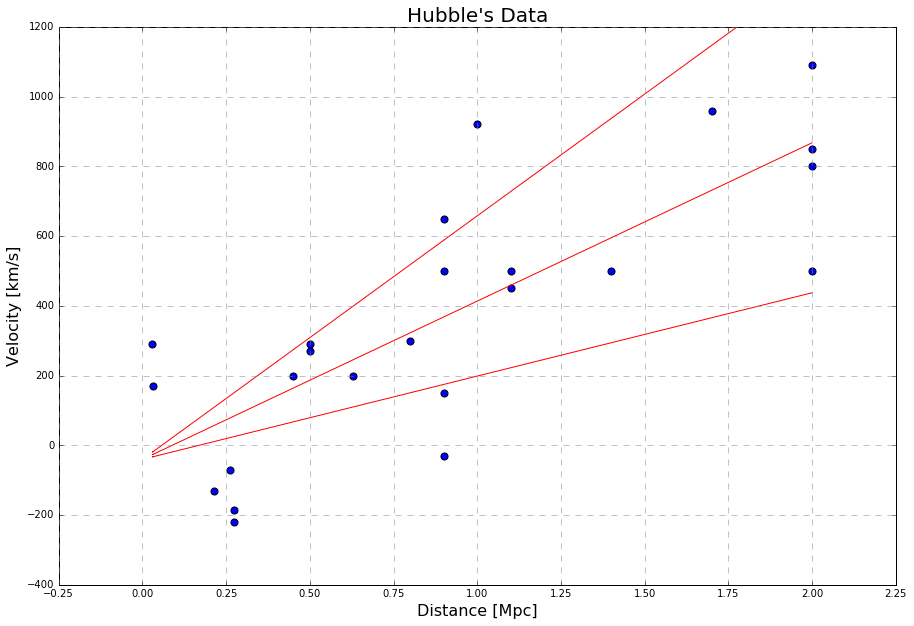

Hubble constant for hubble data 1 is 453.86 ± 158.85 Km/s/Mpc


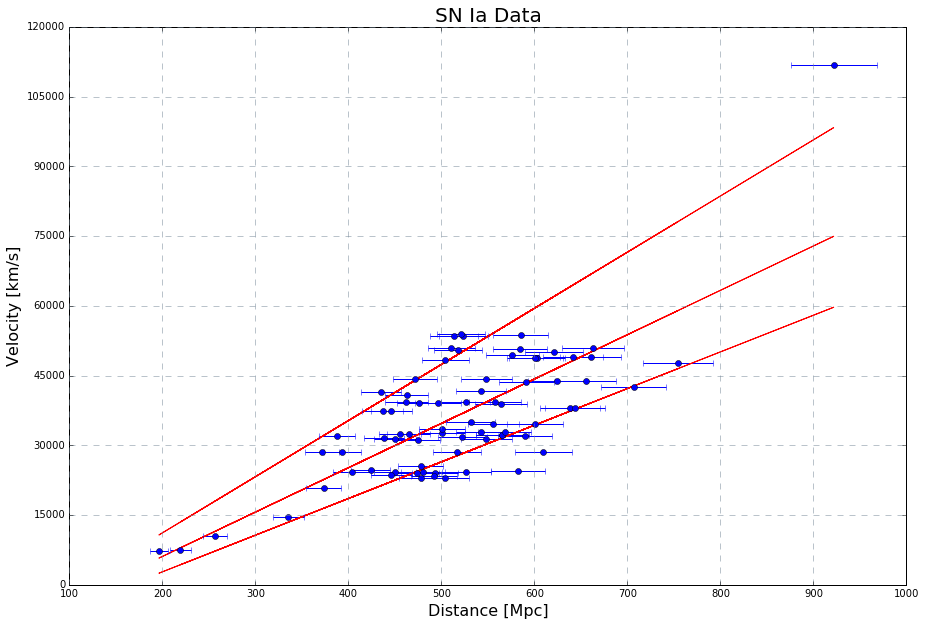

Hubble constant for hubble data 2 is 95.38 ± 20.03 Km/s/Mpc


In [134]:
data1='hubble1.dat'
hubble1_data=np.loadtxt(data1,usecols=(1,2,3,4,5,6))

data2='hubble2.dat'
hubble2_data=np.loadtxt(data2)

hubble1_velocity=hubble1_data[:,2]
hubble2_velocity=hubble2_data[:,5]

hubble1_distance=hubble1_data[:,1]
hubble2_distance=hubble2_data[:,4]

(m,b)=polyfit(hubble1_distance,hubble1_velocity,1)
(m4,b4)=polyfit(hubble1_distance+0.9*hubble1_distance,hubble1_velocity,1)
(m5,b5)=polyfit(hubble1_distance-0.35*hubble1_distance,hubble1_velocity,1)


yp=polyval([m,b],hubble1_distance)
yp4=polyval([m4,b4],hubble1_distance)
yp5=polyval([m5,b5],hubble1_distance)
plt.figure(figsize=(15,10))
plt.plot(hubble1_distance,yp, color='r')
plt.plot(hubble1_distance,yp4, color='r')
plt.plot(hubble1_distance,yp5, color='r')
plt.scatter(hubble1_distance,hubble1_velocity, s=50)
plt.xlabel('Distance [Mpc]', fontsize=16)
plt.ylabel('Velocity [km/s]', fontsize=16)
plt.title("Hubble's Data", fontsize=20)
plt.xlim([-0.25,2.25])
plt.ylim([-200,1200])
plt.xticks(np.arange(-0.25,2.5,0.25))
plt.yticks(np.arange(-400,1400,200))
plt.grid(True, linestyle='--', color='#778899')
plt.show()


print "Hubble constant for hubble data 1 is %.2f ± %.2f Km/s/Mpc" % (m, (0.35*m))
(m1,b1)=polyfit(hubble2_distance,hubble2_velocity,1)
(m2,b2)=polyfit(hubble2_distance+0.21*hubble2_distance,hubble2_velocity,1)
(m3,b3)=polyfit(hubble2_distance-0.21*hubble2_distance,hubble2_velocity,1)

yp1=polyval([m1,b1],hubble2_distance)
yp2=polyval([m2,b1],hubble2_distance)
yp3=polyval([m3,b1],hubble2_distance)
plt.figure(figsize=(15,10))
plt.plot(hubble2_distance,yp1, color='r')
plt.plot(hubble2_distance,yp2, color='r')
plt.plot(hubble2_distance,yp3, color='r')
plt.errorbar(hubble2_distance,hubble2_velocity,xerr=hubble2_distance*.05,fmt='o',markersize=6)
plt.xlabel('Distance [Mpc]', fontsize=16)
plt.ylabel('Velocity [km/s]', fontsize=16)
plt.title("SN Ia Data", fontsize=20)
plt.xlim([100,1000])
plt.ylim([0,120000])
plt.xticks(np.arange(100,1100,100))
plt.yticks(np.arange(0,130000,15000))
plt.grid(True, linestyle='--', color='#778899')
plt.show()



print "Hubble constant for hubble data 2 is %.2f ± %.2f Km/s/Mpc" % (m1, (0.21*m1))

# 4 Concordance Model

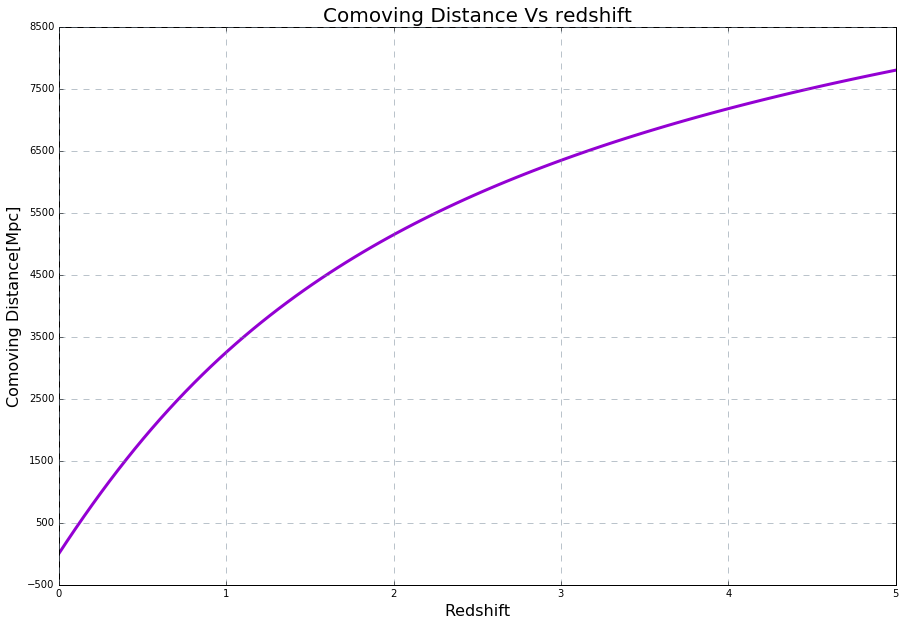

In [199]:
c=3e5
omega_r=8.5e-5
omega_m=0.27
omega_lamda= 0.73
H_0=72
Dh=c/H0

z=np.linspace(0,5,6)

def E(z):
    return np.power((1+z)**4*omega_r+((1+z)**3)*omega_m+omega_lamda,0.5)
def f(z):
    return Dh*(1/E(z))


func = lambda z: f(z)
integrate.quad(func,0,5)

D_c=[]
for i in range(100):
    answer=integrate.quad(func,0,5*(i+0.0)/100)
    #answer1=answer[0]
    D_c.append(answer[0])
    

y=np.linspace(0,5,100)


plt.figure(figsize=(15,10))
plt.plot(y,D_c, linewidth=3, color='#9400D3')
plt.title('Comoving Distance Vs redshift', fontsize=20)
plt.xlabel('Redshift', fontsize=16)
plt.ylabel('Comoving Distance[Mpc]', fontsize=16)
plt.grid(True, linestyle='--', color='#778899')
plt.xlim([0,5])
plt.ylim([-1,8000])
plt.xticks(np.arange(0,6,1))
plt.yticks(np.arange(-500,9000,1000))
plt.show()

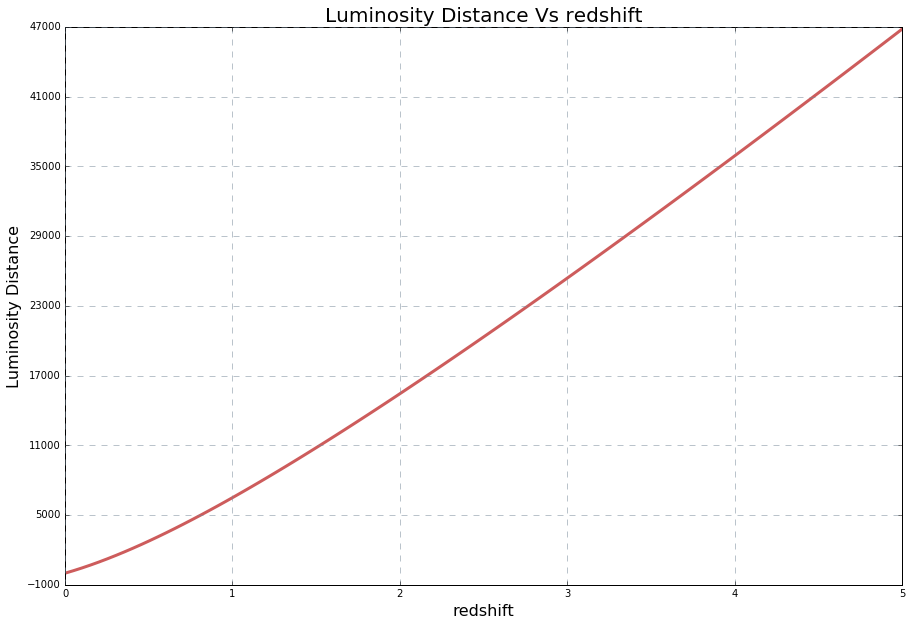

In [198]:
D_L=D_c*(1+y)
D_A=D_c/(1+y)

plt.figure(figsize=(15,10))
plt.plot(y,D_L, linewidth=3, color='#CD5C5C')
plt.title('Luminosity Distance Vs redshift', fontsize=20)
plt.xlabel('redshift', fontsize=16)
plt.ylabel('Luminosity Distance', fontsize=16)
plt.grid(True, linestyle='--', color='#778899')
plt.xlim([0,5])
plt.ylim([-1000,47000])
plt.xticks(np.arange(0,6,1))
plt.yticks(np.arange(-1000,52000,6000))
plt.show()

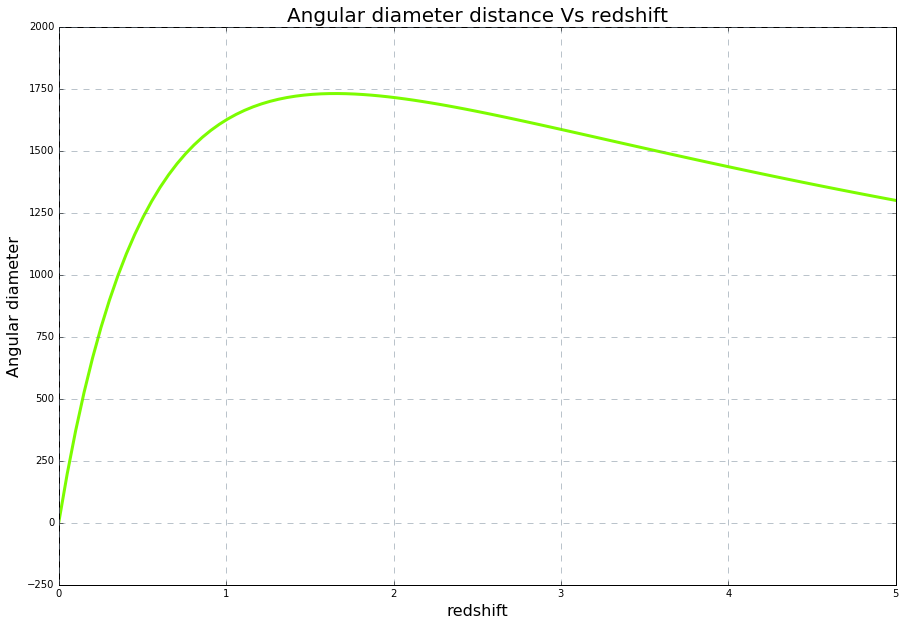

In [200]:
plt.figure(figsize=(15,10))
plt.plot(y,D_A, linewidth=3, color='#7CFC00')
plt.title('Angular diameter distance Vs redshift', fontsize=20)
plt.xlabel('redshift', fontsize=16)
plt.ylabel('Angular diameter', fontsize=16)
plt.grid(True, linestyle='--', color='#778899')
plt.xlim([0,5])
plt.ylim([-250,2000])
plt.xticks(np.arange(0,6,1))
plt.yticks(np.arange(-250,2250,250))
plt.show()

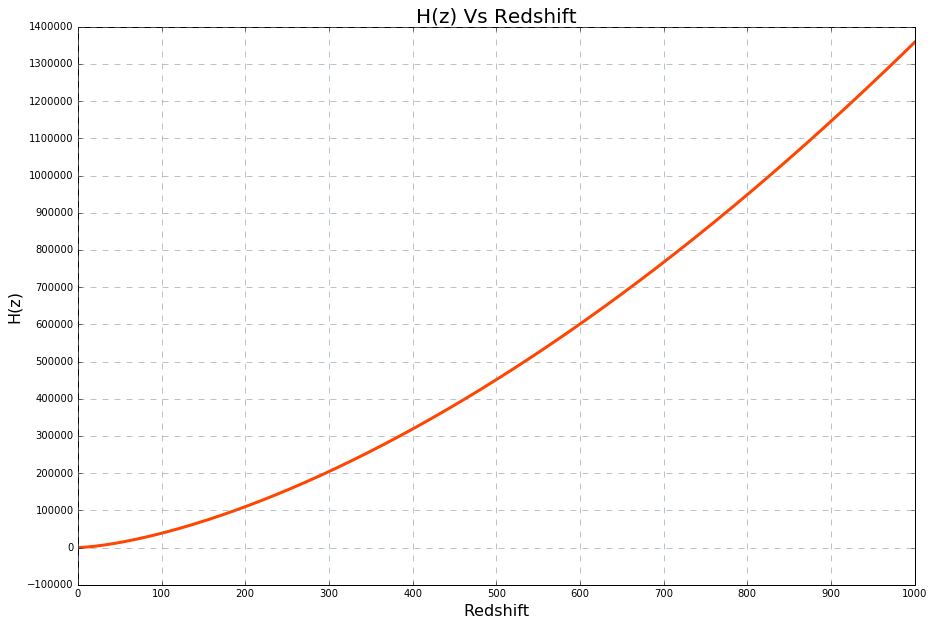

In [194]:
y1=np.linspace(0,1000,1000)

H_Z=H0*E(y1)

plt.figure(figsize=(15,10))
plt.plot(y1,H_Z, linewidth=3, color='#FF4500')
plt.title('H(z) Vs Redshift', fontsize=20)
plt.xlabel('Redshift', fontsize=16)
plt.ylabel('H(z)', fontsize=16)
plt.grid(True, linestyle='--', color='#778899')
plt.xlim([0,1000])
plt.ylim([-10000,1400000])
plt.xticks(np.arange(0,1100,100))
plt.yticks(np.arange(-100000,1500000,100000))
plt.show()